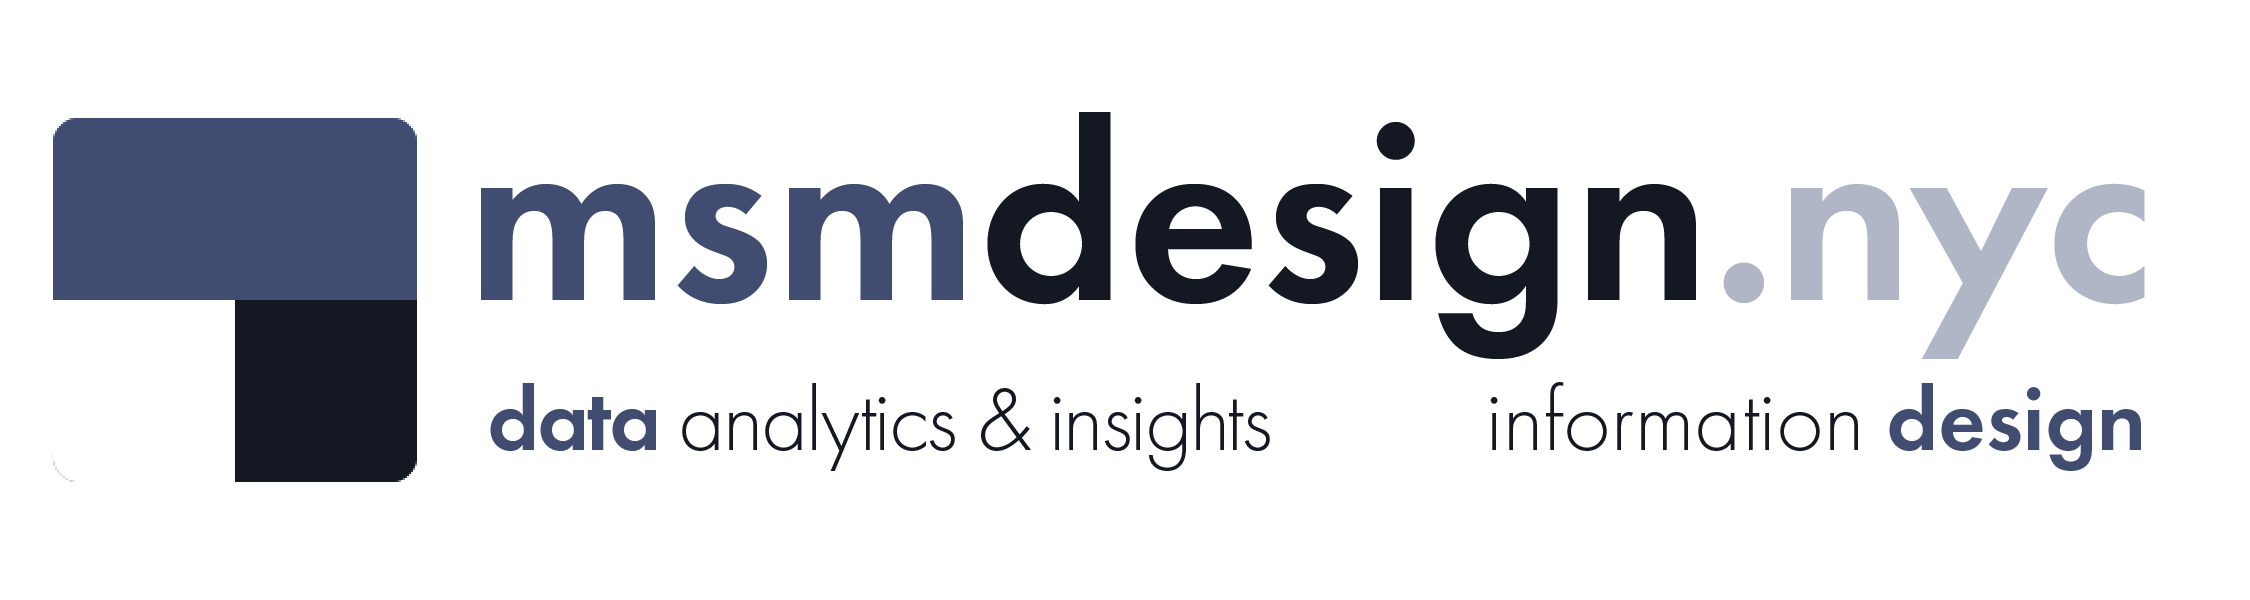

---
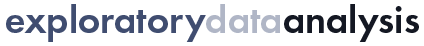

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.

---

# Evictions

**Dataset Analyzed:** *Evictions*

**About This Dataset:** This dataset lists pending, scheduled and executed evictions within the five boroughs, for the year 2017 - Present. The data fields may be sorted by Court Index Number, Docket Number, Eviction Address, Apartment Number, Executed Date, Marshal First Name, Marshal Last Name, Residential or Commercial (property type), Borough, Zip Code and Scheduled Status (Pending/Scheduled).

Eviction data is compiled from the majority of New York City Marshals. Marshals are independent public officials and should be contacted directly for more information at https://www1.nyc.gov/site/doi/offices/marshals-list.page Data prior to January 1 2017 is not currently available.

Data provided by Department of Investigation (DOI), The City of New York


**Acknowledgements:** NYC open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** INS-002


**EDA Publication Date:** Monday, January 2, 2023


**Language:** Python


**Libraries Used:** NumPy, pandas, Matplotlib


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

---

## **0. Prepare the workspace**

### 0.1 Import Python libraries, packages and functions

In [1]:
# import libraries for data wrangling, aggregate functions and basic descriptive statistics
import numpy as np
import pandas as pd

# import data visualization packages
import matplotlib.pyplot as plt

### 0.2 Adjust display options to make plots easier to read and understand

In [2]:
# allow plots to display inline within the notebook
%matplotlib inline

### 0.3 Set Markdown tables to align-left within notebook cells

In [3]:
%%html
<style>
table {float:left}
</style>

### 0.4 Load the raw data file into the notebook and visually confirm that it has been read in as expected

In [4]:
# load the data from a csv file (stored locally) into a new DataFrame object

csv = r"F:\Creative Cloud Files\MSM Client 001 - Mister Shepherd Media LLC\MSM Design\github_msm_design\exploratory-data-analysis\insights-made-fresh-daily\nyc-open-data\all-other-materials\ins-002-2023-01-02\Evictions.csv"

evictions = pd.read_csv(csv, encoding='utf-8')

In [5]:
# glimpse the first three rows

evictions.head(3)

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,2434/19,352534,1629-31 WALTON AVENUE,E1,04/30/2019,Thomas,Bia,Residential,BRONX,10452,Not an Ejectment,Possession,40.844246,-73.912614,4.0,14.0,22702.0,2008151.0,2.028470e+09,Mount Hope
1,62143/17,12634,86-22 SOMERSET STREET,NaN,01/11/2018,Edward,Guida,Residential,QUEENS,11432,Not an Ejectment,Possession,40.717650,-73.780305,8.0,24.0,472.0,4213232.0,4.099520e+09,Jamaica Estates-Holliswood
2,88155/17-1,9233,1074 EASTERN PARKWAY,35,03/26/2018,George,"Essock, Jr.",Residential,BROOKLYN,11213,Not an Ejectment,Possession,40.668879,-73.932717,9.0,35.0,351.0,3037545.0,3.013960e+09,Crown Heights North


In [6]:
# glimpse the last three rows

evictions.tail(3)

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
71792,96270/17,80972,2054 BERGEN AVENUE,WALK IN APARTMENT,04/20/2018,Henry,Daley,Residential,BROOKLYN,11234,Not an Ejectment,Possession,40.623054,-73.904788,18.0,46.0,69602.0,3237566.0,3.084160e+09,Georgetown-Marine Park-Bergen Beach-Mill Basin
71793,59745/18,79449,1919 BERGEN STREET,ENTIRE 2ND FLOOR,05/07/2018,Justin,Grossman,Residential,BROOKLYN,11233,Not an Ejectment,Possession,40.674348,-73.917714,16.0,41.0,303.0,3038878.0,3.014460e+09,Ocean Hill
71794,300150/22,361531,2101 LEXINGTON AVENUE,6-K,12/14/2022,Thomas,Bia,Residential,MANHATTAN,10035,Not an Ejectment,Possession,40.805383,-73.936162,11.0,9.0,242.0,1087150.0,1.017750e+09,East Harlem North


In [7]:
# glimpse ten randomly selected rows

evictions.sample(10, random_state=42)

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
20685,68609/17,167513,101 WOODRUFF AVENUE,2D,12/12/2017,Alfred,Locascio,Residential,BROOKLYN,11226,Not an Ejectment,Possession,40.653708,-73.962710,14.0,40.0,50804.0,3115918.0,3.050530e+09,Flatbush
50712,B900637/17,96417,4150C BOSTON ROAD,PREMISES,07/03/2017,Darlene,Barone,Commercial,BRONX,10475,Not an Ejectment,Possession,40.886579,-73.826332,12.0,12.0,46202.0,2115733.0,2.052820e+09,Co-op City
2225,70847/17,70390,536 LOGAN STREET,GARAGE #3,10/11/2017,Justin,Grossman,Commercial,BROOKLYN,11208,Not an Ejectment,Possession,40.672907,-73.875740,5.0,42.0,1194.0,3095301.0,3.042450e+09,East New York
7110,K78412/18B,94534,1404 BROOKLYN AVENUE,4C,07/10/2019,Ileana,Rivera,Residential,BROOKLYN,11210,Not an Ejectment,Possession,40.638549,-73.942469,17.0,45.0,782.0,3327336.0,3.049810e+09,East Flatbush-Farragut
16933,41977/17,74650,770 EAST 221ST ST,2C,11/14/2017,Henry,Daley,Residential,BRONX,10467,Not an Ejectment,Possession,40.884382,-73.860170,12.0,12.0,396.0,2058116.0,2.046680e+09,Williamsbridge-Olinville
71369,62551/17,7458,1841 UNIVERSITY AVENUE - APT BB1,BB1,05/17/2018,Robert,Renzulli,Residential,BRONX,10453,Not an Ejectment,Possession,40.851565,-73.914365,5.0,14.0,24501.0,2009059.0,2.028790e+09,University Heights-Morris Heights
55947,54903/18-2,24582,15-21 QUINCY STREET,5B,10/12/2018,Gary,Rose,Residential,BROOKLYN,11238,Not an Ejectment,Possession,40.685821,-73.960626,2.0,35.0,231.0,3425217.0,3.019690e+09,Clinton Hill
25361,52724/15,74736,40 BRIGHTON AVE.,1,03/31/2017,Kenneth,Giachetta,Residential,STATEN ISLAND,10301,Not an Ejectment,Possession,40.637275,-74.088405,1.0,49.0,77.0,5002499.0,5.001040e+09,West New Brighton-New Brighton-St. George
2623,35716/18,487227,1575 TOWNSEND AVENUE,9,05/21/2019,Danny,Weinheim,Residential,BRONX,10452,Not an Ejectment,Possession,40.843608,-73.914133,4.0,14.0,209.0,2008140.0,2.028460e+09,West Concourse
33505,210619/16,106088,90 PALADINO AVE,04D,03/06/2017,Maxine,Chevlowe,Residential,MANHATTAN,10035,Not an Ejectment,Eviction,40.797941,-73.929596,11.0,8.0,192.0,1081285.0,1.018080e+09,East Harlem North


**The data has been loaded and has been read in as expected.**

### 0.5. Check the data type of each column

In [9]:
# display a listing of each of the DataFrame's columns and its data type

evictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71795 entries, 0 to 71794
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Court Index Number         71795 non-null  object 
 1   Docket Number              71795 non-null  int64  
 2   Eviction Address           71795 non-null  object 
 3   Eviction Apartment Number  59797 non-null  object 
 4   Executed Date              71795 non-null  object 
 5   Marshal First Name         71795 non-null  object 
 6   Marshal Last Name          71795 non-null  object 
 7   Residential/Commercial     71795 non-null  object 
 8   BOROUGH                    71795 non-null  object 
 9   Eviction Postcode          71795 non-null  int64  
 10  Ejectment                  71795 non-null  object 
 11  Eviction/Legal Possession  71795 non-null  object 
 12  Latitude                   64893 non-null  float64
 13  Longitude                  64893 non-null  flo

### 0.6 Refer to the [data dictionary](https://data.cityofnewyork.us/api/views/6z8x-wfk4/files/a697b3a5-518e-4610-9777-3c7de19f7519?download=true&filename=Marshals_Evictions_Data_Dictionary_4.2021.xlsx) and make sure that our DataFrame's data types match the source data. Reassign data types where needed.

In [11]:
# cast the 'Executed Date' column to datetime data type

evictions['Executed Date'] = pd.to_datetime(evictions['Executed Date'], errors='coerce')

In [15]:
# cast these columns to the categorical data type

evictions['Residential/Commercial']       = evictions['Residential/Commercial'].astype('category')
evictions['BOROUGH']                      = evictions['BOROUGH'].astype('category')
evictions['Eviction Postcode']            = evictions['Eviction Postcode'].astype('category')
evictions['Ejectment']                    = evictions['Ejectment'].astype('category')
evictions['Eviction/Legal Possession']    = evictions['Eviction/Legal Possession'].astype('category')
evictions['Community Board']              = evictions['Community Board'].astype('category')
evictions['Council District']             = evictions['Council District'].astype('category')
evictions['Census Tract']                 = evictions['Census Tract'].astype('category')
evictions['BIN']                          = evictions['BIN'].astype('category')
evictions['BBL']                          = evictions['BBL'].astype('category')
evictions['NTA']                          = evictions['NTA'].astype('category')

In [16]:
# display the DataFrame info once again to confirm that the data type changes have been made

evictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71795 entries, 0 to 71794
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Court Index Number         71795 non-null  object        
 1   Docket Number              71795 non-null  int64         
 2   Eviction Address           71795 non-null  object        
 3   Eviction Apartment Number  59797 non-null  object        
 4   Executed Date              71795 non-null  datetime64[ns]
 5   Marshal First Name         71795 non-null  object        
 6   Marshal Last Name          71795 non-null  object        
 7   Residential/Commercial     71795 non-null  category      
 8   BOROUGH                    71795 non-null  category      
 9   Eviction Postcode          71795 non-null  category      
 10  Ejectment                  71795 non-null  category      
 11  Eviction/Legal Possession  71795 non-null  category      
 12  Lati

---

## **1. Describe the characteristics of the dataset**

### 1.1 How many rows and how many columns are in our data set?

In [55]:
# display the number of rows and columns in the DataFrame

rows = evictions.shape[0]
columns = evictions.shape[1]

print(f'There are {rows} rows and {columns} columns in the data set.')

There are 71795 rows and 20 columns in the data set.


### 1.2 Identify the index of our DataFrame

In [18]:
# display the index of the DataFrame

evictions.index

RangeIndex(start=0, stop=71795, step=1)

Our DataFrame has an interger index. 
We know from the data dictionary that each row is pending, scheduled or executed eviction case.

### 1.3 What are the column headings in our dataset?

In [19]:
# display a list of the DataFrame's columns

all_cols = list(evictions.columns)
print(all_cols)

['Court Index Number', 'Docket Number ', 'Eviction Address', 'Eviction Apartment Number', 'Executed Date', 'Marshal First Name', 'Marshal Last Name', 'Residential/Commercial', 'BOROUGH', 'Eviction Postcode', 'Ejectment', 'Eviction/Legal Possession', 'Latitude', 'Longitude', 'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA']


### 1.4 What are the data types of each column?

In [20]:
# display the data type of each column in the DataFrame

evictions.dtypes

Court Index Number                   object
Docket Number                         int64
Eviction Address                     object
Eviction Apartment Number            object
Executed Date                datetime64[ns]
Marshal First Name                   object
Marshal Last Name                    object
Residential/Commercial             category
BOROUGH                            category
Eviction Postcode                  category
Ejectment                          category
Eviction/Legal Possession          category
Latitude                            float64
Longitude                           float64
Community Board                    category
Council District                   category
Census Tract                       category
BIN                                category
BBL                                category
NTA                                category
dtype: object

### 1.5 How many null values are in each column?

In [21]:
# display the number of missing values in each column of the DataFrame

evictions.isna().sum()

Court Index Number               0
Docket Number                    0
Eviction Address                 0
Eviction Apartment Number    11998
Executed Date                    0
Marshal First Name               0
Marshal Last Name                0
Residential/Commercial           0
BOROUGH                          0
Eviction Postcode                0
Ejectment                        0
Eviction/Legal Possession        0
Latitude                      6902
Longitude                     6902
Community Board               6902
Council District              6902
Census Tract                  6902
BIN                           7031
BBL                           7031
NTA                           6902
dtype: int64

About 10% of the cases are missing geolocation, community board, council district, and building entity numbers.

### 1.6 How many unique values are there in each column?

In [22]:
# display the count of unique elements in each column

evictions.nunique(axis=0, dropna=True)

Court Index Number           66808
Docket Number                62444
Eviction Address             43838
Eviction Apartment Number     7154
Executed Date                 1137
Marshal First Name              26
Marshal Last Name               29
Residential/Commercial           2
BOROUGH                          5
Eviction Postcode              227
Ejectment                        2
Eviction/Legal Possession        3
Latitude                     31463
Longitude                    30874
Community Board                 18
Council District                51
Census Tract                  1293
BIN                          32367
BBL                          30331
NTA                            191
dtype: int64

---

## **2. Summarize the contents of the dataset**

### 2.1 Summarize the columns containing datetime variables

In [25]:
# summarize the data contained in columns with the 'datetime' data type only

evictions['Executed Date'].describe(datetime_is_numeric=True) 

count                            71795
mean     2018-10-17 00:57:06.155024896
min                2017-01-03 00:00:00
25%                2017-10-10 00:00:00
50%                2018-07-25 00:00:00
75%                2019-06-12 00:00:00
max                2022-12-29 00:00:00
Name: Executed Date, dtype: object

### 2.2 Summarize the columns containing categorical variables

In [26]:
# summarize the data contained in columns with the 'category' data type only

evictions.describe(include=['category'])

,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Community Board,Council District,Census Tract,BIN,BBL,NTA
count,71795,71795,71795,71795,71795,64893.0,64893.0,64893.0,64764.0,6.476400e+04,64893
unique,2,5,227,2,3,18.0,51.0,1293.0,32367.0,3.033100e+04,191
top,Residential,BRONX,10467,Not an Ejectment,Possession,12.0,15.0,455.0,3000000.0,2.028820e+09,East New York
freq,65118,23322,1958,71745,70531,7213.0,3772.0,321.0,79.0,1.990000e+02,1440


---

## **3. Select a subset of data for closer examination**

### 3.1 Select a subset of columns

In [72]:
# display all columns

list(evictions.columns)

['Court Index Number',
 'Docket Number ',
 'Eviction Address',
 'Eviction Apartment Number',
 'Executed Date',
 'Marshal First Name',
 'Marshal Last Name',
 'Residential/Commercial',
 'BOROUGH',
 'Eviction Postcode',
 'Ejectment',
 'Eviction/Legal Possession',
 'Latitude',
 'Longitude',
 'Community Board',
 'Council District',
 'Census Tract',
 'BIN',
 'BBL',
 'NTA']

In [31]:
# select a subset of columns to examine
selected_cols = ['Executed Date',
                'Residential/Commercial',
                'BOROUGH',
                'Ejectment',
                'Eviction/Legal Possession',
                'Community Board',
                'Council District',
                'Census Tract']

evictions_temp = evictions[selected_cols].copy()

### 3.2 Select a subset of rows

In [51]:
# select eviction cases from the year 2022 only 

evictions2022 = evictions_temp.loc[(evictions_temp['Executed Date'] >= '2022-01-01 00:00:00') 
                                 & (evictions_temp['Executed Date'] < '2023-01-01 00:00:00')].copy()

In [50]:
# confirm that the newly created DataFrame contains cases from 2022 only


evictions2022['Executed Date'].describe(datetime_is_numeric=True)

count                             5038
mean     2022-08-08 08:55:21.317983488
min                2022-01-03 00:00:00
25%                2022-05-27 00:00:00
50%                2022-08-24 00:00:00
75%                2022-10-28 00:00:00
max                2022-12-29 00:00:00
Name: Executed Date, dtype: object

In [57]:
# display the size of the new data subset

rows = evictions2022.shape[0]
columns = evictions2022.shape[1]

print(f'There are {rows} rows and {columns} columns in the data subset.')

There are 5038 rows and 8 columns in the data subset.


---

## 4. **Describe and summarize the selected subset of data**

### 4.1 Explore individual Series in the DataFrame

In [58]:
# display all available columns

list(evictions2022.columns)

['Executed Date',
 'Residential/Commercial',
 'BOROUGH',
 'Ejectment',
 'Eviction/Legal Possession',
 'Community Board',
 'Council District',
 'Census Tract']

In [59]:
# what is total number of evictions filed in 2022?

evictions2022['Executed Date'].count()

5038

In [64]:
# what is the range of dates of the evictions?

print(evictions2022['Executed Date'].min())
print('to')
print(evictions2022['Executed Date'].max())

2022-01-03 00:00:00
to
2022-12-29 00:00:00


***From the data dictionary:***

> **Ejectment:** An action in ejectment is a way for a landlord to obtain possession of a residence and may be started in either Civil or Supreme Court.

In [65]:
# what was the distribution of ejectment types?

evictions2022['Ejectment'].value_counts()

Not an Ejectment    5037
Ejectment              1
Name: Ejectment, dtype: int64

***From the data dictionary:***

> **Eviction/Legal Possession:** Process by which a warrant of eviction is executed.  Landlord may request an eviction whereby the tenant and his/her property are removed by a marshal, or a legal possession whereby the tenant is removed and his/her property remains under the care and control of the landlord as bailee for the tenant.

In [66]:
# what was the distribution of 'eviction vs. legal possession'?

evictions2022['Eviction/Legal Possession'].value_counts()

Possession     5024
Eviction         14
Unspecified       0
Name: Eviction/Legal Possession, dtype: int64

In [68]:
# what was the distribution of evitiction dates

evictions2022['Executed Date'].value_counts(bins=6)

(2022-10-30, 2022-12-29]                       1250
(2022-08-31, 2022-10-30]                       1184
(2022-07-02, 2022-08-31]                        889
(2022-05-03, 2022-07-02]                        778
(2022-03-04, 2022-05-03]                        572
(2022-01-02 15:21:35.999999999, 2022-03-04]     365
Name: Executed Date, dtype: int64

In [69]:
evictions2022['Executed Date'].value_counts(bins=6, normalize=True)

(2022-10-30, 2022-12-29]                       0.248114
(2022-08-31, 2022-10-30]                       0.235014
(2022-07-02, 2022-08-31]                       0.176459
(2022-05-03, 2022-07-02]                       0.154426
(2022-03-04, 2022-05-03]                       0.113537
(2022-01-02 15:21:35.999999999, 2022-03-04]    0.072449
Name: Executed Date, dtype: float64

In [84]:
# what is the distribution of evictions by NYC borough

evictions2022['BOROUGH'].value_counts()

BROOKLYN         1863
BRONX            1163
MANHATTAN         927
QUEENS            818
STATEN ISLAND     267
Name: BOROUGH, dtype: int64

In [76]:
evictions2022['BOROUGH'].value_counts(normalize=True)

BROOKLYN         0.369790
BRONX            0.230846
MANHATTAN        0.184002
QUEENS           0.162366
STATEN ISLAND    0.052997
Name: BOROUGH, dtype: float64

***For comparison, here is the NYC Population by Borough***


|               Name              |  Status | Population Estimate 2021-07-01 | Percentage of Overall Population |
|:-------------------------------:|:-------:|:------------------------------:|----------------------------------|
| Bronx                           | Borough |                      1,424,948 | 17%                              |
| Brooklyn (Kings County)         | Borough |                      2,641,052 | 32%                              |
| Manhattan (New York County)     | Borough |                      1,576,876 | 20%                              |
| Queens                          | Borough |                      2,331,143 | 28%                              |
| Staten Island (Richmond County) | Borough |                        493,494 | 6%                               |
</br>***source: https://www.citypopulation.de/en/usa/newyorkcity***

In [83]:
# what is the distribution of evictions by NYC council district?

evictions2022['Council District'].value_counts()

15.0    183
41.0    179
40.0    155
42.0    152
45.0    147
49.0    146
14.0    144
3.0     142
12.0    140
17.0    136
37.0    134
36.0    132
16.0    125
9.0     120
11.0    117
18.0    110
8.0     109
35.0    109
7.0      92
10.0     90
34.0     89
46.0     89
27.0     82
48.0     82
43.0     81
47.0     80
1.0      80
2.0      77
13.0     77
28.0     77
31.0     75
33.0     70
5.0      66
50.0     65
38.0     65
4.0      62
21.0     55
26.0     54
6.0      51
24.0     50
20.0     50
22.0     45
29.0     44
39.0     41
51.0     41
44.0     40
25.0     36
30.0     34
19.0     30
32.0     25
23.0     21
Name: Council District, dtype: int64

In [79]:
# what is the distribution of evictions by NYC council district?

evictions2022['Council District'].value_counts(normalize=True)

15.0    0.040703
41.0    0.039813
40.0    0.034475
42.0    0.033808
45.0    0.032696
49.0    0.032473
14.0    0.032028
3.0     0.031584
12.0    0.031139
17.0    0.030249
37.0    0.029804
36.0    0.029359
16.0    0.027802
9.0     0.026690
11.0    0.026023
18.0    0.024466
8.0     0.024244
35.0    0.024244
7.0     0.020463
10.0    0.020018
34.0    0.019795
46.0    0.019795
27.0    0.018238
48.0    0.018238
43.0    0.018016
47.0    0.017794
1.0     0.017794
2.0     0.017126
13.0    0.017126
28.0    0.017126
31.0    0.016681
33.0    0.015569
5.0     0.014680
50.0    0.014457
38.0    0.014457
4.0     0.013790
21.0    0.012233
26.0    0.012011
6.0     0.011343
24.0    0.011121
20.0    0.011121
22.0    0.010009
29.0    0.009786
39.0    0.009119
51.0    0.009119
44.0    0.008897
25.0    0.008007
30.0    0.007562
19.0    0.006673
32.0    0.005560
23.0    0.004671
Name: Council District, dtype: float64

In [82]:
# what is the distribution of evictions by NYC community board?

evictions2022['Community Board'].value_counts()

12.0    437
1.0     390
4.0     371
5.0     364
9.0     343
3.0     333
7.0     325
8.0     269
2.0     237
11.0    222
10.0    213
17.0    208
6.0     202
14.0    168
16.0    125
13.0    123
18.0    104
15.0     62
Name: Community Board, dtype: int64

In [81]:
# what is the distribution of evictions by NYC community board?

evictions2022['Community Board'].value_counts(normalize=True)

12.0    0.097198
1.0     0.086744
4.0     0.082518
5.0     0.080961
9.0     0.076290
3.0     0.074066
7.0     0.072286
8.0     0.059831
2.0     0.052714
11.0    0.049377
10.0    0.047375
17.0    0.046263
6.0     0.044929
14.0    0.037367
16.0    0.027802
13.0    0.027358
18.0    0.023132
15.0    0.013790
Name: Community Board, dtype: float64

### 4.2 Explore the data set using crosstabs

In [89]:
# find the count of how often each combination of two categories occur

pd.crosstab(evictions2022['Council District'], evictions2022['BOROUGH'])

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
Council District,,,,,
1.0,0,0,80,0,0
2.0,0,0,77,0,0
3.0,0,0,142,0,0
4.0,0,0,62,0,0
5.0,0,0,66,0,0
6.0,0,0,51,0,0
7.0,0,0,92,0,0
8.0,72,0,37,0,0
9.0,0,0,120,0,0


In [88]:
pd.crosstab(evictions2022['Council District'], evictions2022['BOROUGH'], normalize=True)

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
Council District,,,,,
1.0,0.000000,0.000000,0.017794,0.000000,0.000000
2.0,0.000000,0.000000,0.017126,0.000000,0.000000
3.0,0.000000,0.000000,0.031584,0.000000,0.000000
4.0,0.000000,0.000000,0.013790,0.000000,0.000000
5.0,0.000000,0.000000,0.014680,0.000000,0.000000
6.0,0.000000,0.000000,0.011343,0.000000,0.000000
7.0,0.000000,0.000000,0.020463,0.000000,0.000000
8.0,0.016014,0.000000,0.008230,0.000000,0.000000
9.0,0.000000,0.000000,0.026690,0.000000,0.000000


---

## **5. Next steps**

In [73]:
# export data for data graphic creation

evictions_data = evictions2022['BOROUGH'].value_counts(normalize=True)

In [75]:
evictions_data.to_csv('evictions_data.csv')

***

---